In [1]:
# Face Detection using 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow

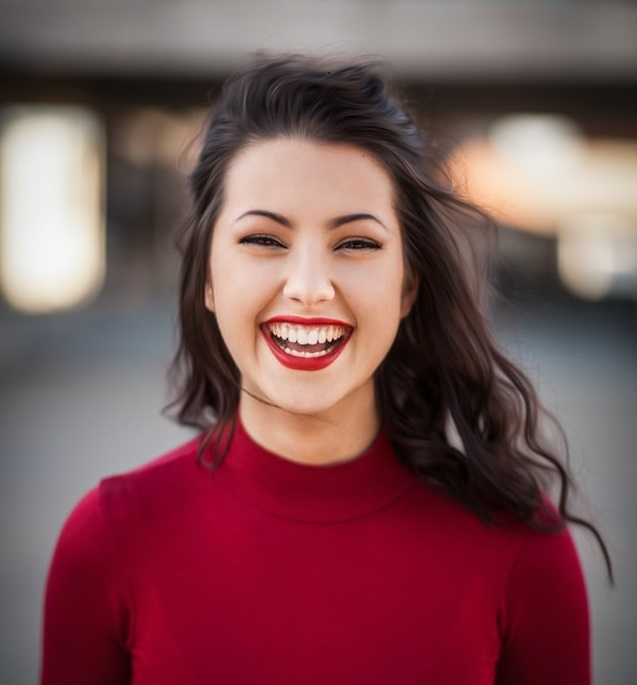

In [4]:
lady = cv.imread("/content/drive/MyDrive/Colab Notebooks/opencv_for_python/Resources/Photos/lady.jpg")
cv2_imshow(lady)
cv.waitKey(0) 
cv.destroyAllWindows()

In [54]:
people = ['Ben Afflek', 'Elton John', 'Jerry Seinfield', 'Madonna', 'Mindy Kaling']

In [55]:
p = []
for i in os.listdir(r'/content/drive/MyDrive/Colab Notebooks/opencv_for_python/Resources/Faces/train'):
  p.append(i)

In [56]:
print(p)

['Jerry Seinfield', 'Madonna', 'Mindy Kaling', 'Ben Afflek', 'Elton John']


In [57]:
DIR = r'/content/drive/MyDrive/Colab Notebooks/opencv_for_python/Resources/Faces/train'

In [58]:
haar_cascade = cv.CascadeClassifier("/content/drive/MyDrive/Colab Notebooks/opencv_for_python/3_faces/haarcascade_frontalface_default.xml")

features = []
labels = []

In [59]:
def create_train():
  for person in people:
    path = os.path.join(DIR, person)
    label = people.index(person)

    for img in os.listdir(path):
      img_path = os.path.join(path, img)

      img_array = cv.imread(img_path)
      gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)

      faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

      for (x,y,w,h) in faces_rect:
        faces_roi = gray[y:y+h, x:x+w]
        features.append(faces_roi)
        labels.append(label)

In [60]:
create_train()
print(f'Length of the features = {len(features)}')
print(f'Length of the labels = {len(labels)}')
print('Training done -----------------')

Length of the features = 100
Length of the labels = 100
Training done -----------------


In [61]:
features = np.array(features, dtype='object')
labels = np.array(labels)

In [62]:
face_recognizer = cv.face.LBPHFaceRecognizer_create()

In [63]:
# Train the Recognizer on the featuers list and the labels list
face_recognizer.train(features, labels)

face_recognizer.save('/content/drive/MyDrive/Colab Notebooks/opencv_for_python/3_faces/face_trained.yml')
np.save('/content/drive/MyDrive/Colab Notebooks/opencv_for_python/3_faces/features.npy', features)
np.save('/content/drive/MyDrive/Colab Notebooks/opencv_for_python/3_faces/labels.npy', labels)